# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3
total_shares__amount = 6.5

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url= btc_url + "?format=json"
eth_url= eth_url + "?format=json"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)

# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
print(eth_price)


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price  
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

13054.6
412.73
The current value of your 1.2 BTC is $15665.52
The current value of your 5.3 ETH is $2187.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = os.getenv("ALPACA_API_KEY")
api_secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    api_key,
    api_secret,
    api_version="v2")

In [30]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-22", tz="America/New_York").isoformat()



# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
port = alpaca.get_barset(tickers, timeframe, start=today).df
# Preview DataFrame
# YOUR CODE HERE!
port

AGG                                     SPY  \
                             open    high    low   close   volume    open   
2020-10-22 00:00:00-04:00  117.51  117.54  117.3  117.31  3938694  342.96   
2020-10-23 00:00:00-04:00  117.30  117.52  117.3  117.47  3482671  345.93   

                                                             
                             high     low   close    volume  
2020-10-22 00:00:00-04:00  345.24  340.65  344.63  45094573  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(port["AGG"]["close"][0])
#agg_close_price.index = agg_close_price.index.date
spy_close_price = float(port["SPY"]["close"][0])
#spy_close_price.index = spy_close_price.date
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.31
Current SPY closing price: $344.63


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17231.50
The current value of your 200 AGG shares is $23462.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
total_crypto_value = my_btc_value + my_eth_value
total_shares_amount = my_agg_value + my_spy_value


data = {'amount':[total_crypto_value, total_shares_amount]}
df_savings = pd.DataFrame(data, index = ['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,17852.989
shares,40693.500


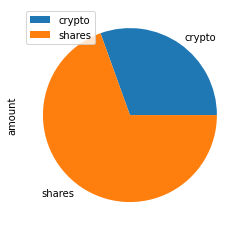

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y = "amount" )

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = emergency_fund + total_crypto_value + total_shares_amount
total_savings
# Validate saving health
# YOUR CODE HERE!
if (total_savings > emergency_fund):
    print(f"You have savings!")
          
if (total_savings == emergency_fund):
    print(f"You met your goal!")
    
if (total_savings < emergency_fund):
    print(f"Not there yet!")
    
    

You have savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
weights = [.60, .40]
num_simulation = 500

tickers = ["SPY", "AGG"]
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_stock_data = df_ticker
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = weights,
    num_simulation = num_simulation,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data

AGG                                         \
                             open      high       low    close    volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.0350  109.210   2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.9200  109.060   1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.2840  109.420   1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.3500  109.360   1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.1100  109.150   1465173   
...                           ...       ...       ...      ...       ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  24615464   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34239733   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9021388   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420   

                                             SPY                          \
                          daily_return      open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.1600  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.2800  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.9800  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.1100  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.7300  209.55  208.01  208.63   
...                                ...       ...     ...     ...     ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.62  327.73  328.76   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.06  327.86  330.03   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.39  331.18  332.06   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.46  331.13  334.31   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.88  332.30  334.55   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245  
...                              ...          ...  
2020-08-03 00:00:00-04:00   89861354     0.006768  
2020-08-04 00:00:00-04:00   73684427     0.003863  
2020-08-05 00:00:00-04:00   72941562     0.006151  
2020-08-06 00:00:00-04:00   76988181     0.006776  
2020-08-07 00:00:00-04:00   98710236     0.000718  

[1260 rows x 12 columns]

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007205,0.997752,0.999866,1.006297,1.001255,1.003148,1.000082,1.006042,0.998385,0.999440,...,1.001955,1.002227,1.003014,1.005967,1.000170,0.996949,1.006499,1.005871,0.994257,0.997768
2,1.005805,0.991558,1.000221,0.998006,1.005861,0.998477,1.001365,1.016139,0.988667,0.997348,...,1.003143,1.007365,1.005307,1.007998,1.001195,0.999724,1.009486,1.011836,0.992783,0.993939
3,1.005113,1.001079,1.001868,1.000270,1.013863,1.010991,1.008228,1.016734,0.987701,1.006966,...,0.997863,1.011732,0.990500,0.997440,0.998836,0.994824,1.013412,1.003816,0.998960,0.991756
4,1.002971,1.006713,1.008202,0.993600,1.009836,1.013440,1.007671,1.015047,0.990212,1.009605,...,0.995898,1.012241,0.996585,0.989055,1.004355,0.998101,1.015561,0.998687,1.010417,0.997283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.155581,6.675268,14.490705,4.746169,7.066252,4.565890,4.529849,6.103554,3.962136,3.859199,...,6.291779,4.725152,4.281024,7.265307,6.886561,4.938814,3.899328,4.458640,2.610735,13.363044
7557,13.108606,6.630735,14.486604,4.774858,7.085235,4.544485,4.508464,6.121898,3.907728,3.835649,...,6.302716,4.703728,4.274497,7.332736,6.871364,4.902888,3.906866,4.468736,2.603301,13.359170
7558,13.164064,6.650033,14.326769,4.790259,7.127650,4.522146,4.515151,6.086620,3.944977,3.800499,...,6.294766,4.713368,4.300729,7.258536,6.858786,4.963991,3.915167,4.442884,2.624270,13.456838
7559,13.285708,6.686029,14.153590,4.823374,7.123925,4.503182,4.541474,6.074474,3.942096,3.834394,...,6.283145,4.758649,4.301249,7.252670,6.823268,4.941470,3.918897,4.405554,2.610782,13.518947


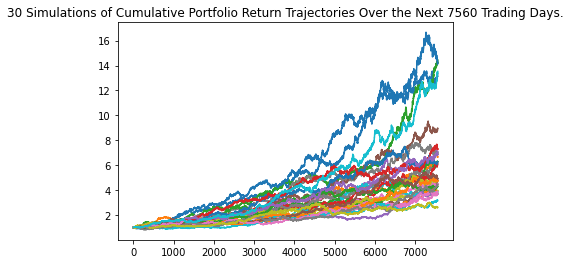

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
time_plot = MC_thirtyyear.plot_simulation()


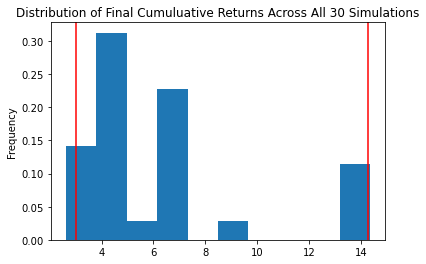

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           30.000000
mean             6.310976
std              3.335669
min              2.621775
25%              4.037919
50%              4.868367
75%              6.872399
max             14.345318
95% CI Lower     3.008466
95% CI Upper    14.253055
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $30084.66 and $142530.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $30084.66 and $142530.55


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")